# <h1 align='center'><font color="red">Comparing Classic Time Series Models vs. LLMs</font></h1> 

<font color="pink">Senior Data Scientist.: Dr.Eddy Giusepe Chirinos Isidro</font>

Link de estudo:

* [Tópicos de Ciência de Dados em Python](https://xbe.at/)

# <font color="gree">Introdução à Previsão de Séries Temporais</font>

<font color="orange">Previsão de séries temporais é uma técnica crucial na ciência de dados, usada para prever valores futuros com base em dados históricos. Esta apresentação compara modelos clássicos como Long `Short-Term Memory (LSTM)` e `Recurrent Neural Networks (RNN)` com `Large Language Models (LLMs)` para previsão de séries temporais usando `Python`.</font>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a simple Time Series:
time = np.arange(0, 100, 0.1)
signal = np.sin(time) + np.random.normal(0, 0.1, len(time)) # Sinal senoidal com ruído adicionado

plt.figure(figsize=(15, 6))
plt.plot(time, signal)
plt.title("Example Time Series", c="r", size=25)
plt.xlabel("Time", c="b", size=20)
plt.ylabel("Value", c="b", size=20)
plt.grid(True)
plt.show()


In [ ]:
import tensorflow as tf
import numpy as np

print("TensorFlow version:", tf.__version__)
print("NumPy version:", np.__version__)

# <font color="gree">Compreendendo LSTMs e RNNs</font>

`LSTMs` e `RNNs` são arquiteturas clássicas de rede neural projetadas para lidar com dados sequenciais. Elas mantêm estados internos para capturar dependências temporais, tornando-as adequadas para previsão de `séries temporais`.

In [ ]:
import tensorflow as tf

# Simple LSTM model:
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(10, 1)), # ReLU (Rectified Linear Unit)
    tf.keras.layers.Dense(1) # Camada densa (totalmente conectada)
])

model.compile(optimizer='adam', loss='mse') # 'mse' significa Mean Squared Error (Erro Quadrático Médio).
print(model.summary())


# Tive que executar: pip install --upgrade tensorflow numpy

# <font color="gree">LSTM para Previsão de Séries Temporais</font>

`LSTMs` são particularmente eficazes para capturar dependências de longo prazo em dados de séries temporais. Aqui está um exemplo de uso de `LSTM` para previsão:

In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
print("TensorFlow is using GPU:", tf.test.is_built_with_cuda())

Num GPUs Available:  0
TensorFlow is using GPU: True


In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
    
# Prepare data:
data = np.sin(np.arange(0, 1000, 0.1)) + np.random.normal(0, 0.1, 10000)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.reshape(-1, 1))

# Create sequences:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 100
X, y = create_sequences(scaled_data, seq_length)

# Build and train model:
model = Sequential([LSTM(50, activation='relu', input_shape=(seq_length, 1)),
                    Dense(1)
                   ])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=8, validation_split=0.1, verbose=0)

# Make predictions:
last_sequence = scaled_data[-seq_length:]
next_prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
print(f"Next value prediction: {scaler.inverse_transform(next_prediction)[0][0]}")


2024-09-10 23:23:14.015385: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-10 23:23:14.015872: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 23:23:14.017811: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-10 23:23:14.023553: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-10 23:23:14.033249: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
Next value prediction: 0.838223934173584


# <font color="gree">RNN para Previsão de Séries Temporais</font>

`RNNs` são mais simples que `LSTMs`, mas ainda podem ser eficazes para sequências mais curtas. Aqui está um exemplo usando `SimpleRNN`:

In [3]:
from tensorflow.keras.layers import SimpleRNN

# Prepare data (assuming X and y are prepared as in the previous slide)

# Build and train model
model = Sequential([
    SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=50, batch_size=4, validation_split=0.1, verbose=0)

# Make predictions
last_sequence = scaled_data[-seq_length:]
next_prediction = model.predict(last_sequence.reshape(1, seq_length, 1))
print(f"Next value prediction: {scaler.inverse_transform(next_prediction)[0][0]}")


/home/eddygiusepe/2_EddyGiusepe_Estudo/Time_Series_ONE/venv_TimeSeries/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Next value prediction: 0.8823580741882324


# <font color="pink">Limitações dos modelos clássicos</font>

Embora `LSTMs` e `RNNs` sejam poderosos, eles têm limitações:

* Eles podem ter dificuldades com dependências de longo prazo.

* Eles exigem um ajuste cuidadoso dos `hiperparâmetros`.

* Eles podem ser computacionalmente caros para grandes conjuntos de dados.

* Eles podem não capturar padrões complexos em `séries temporais multivariadas` de forma eficaz.

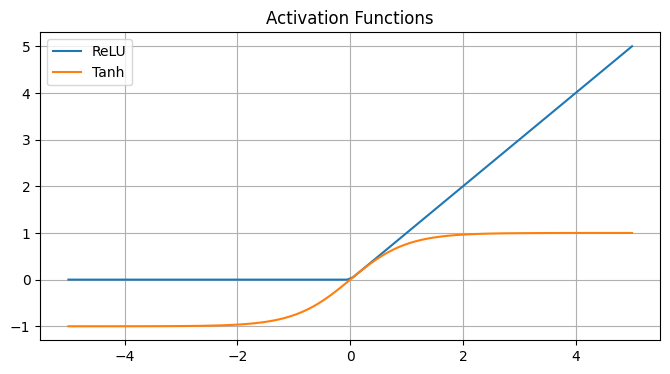

In [6]:
import matplotlib.pyplot as plt
# Visualizing the vanishing gradient problem
def relu(x):
    return np.maximum(0, x)

x = np.linspace(-5, 5, 100)
y_relu = relu(x)
y_tanh = np.tanh(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y_relu, label='ReLU')
plt.plot(x, y_tanh, label='Tanh')
plt.title("Activation Functions")
plt.legend()
plt.grid(True)
plt.show()

# Observe como tanh satura, levando potencialmente ao desaparecimento de gradientes


# <font color="gree">Introdução aos Grandes Modelos de Linguagem (LLMs)</font>

`LLMs`, como `GPT` (`Generative Pre-trained Transformer`), são modelos baseados em `Transformers`, originalmente projetados para tarefas de Processamento de Linguagem Natural (NLP). Recentemente, eles mostraram resultados promissores em previsão de séries temporais.

In [ ]:
import torch
from transformers import GPT2LMHeadModel, GPT2Tokenizer

# Load pre-trained GPT-2 model
model = GPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# Example of tokenizing time series data
time_series = [1.5, 2.3, 3.1, 4.0, 5.2]
tokenized = tokenizer.encode(' '.join(map(str, time_series)))
print(f"Tokenized time series: {tokenized}")
